In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 11,5
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [2]:
# 1. Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
# медиана - это квантиль  50%
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# смоттрим Моды
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
columns = list(df.columns.values)

In [7]:
# cмотрим моду
for i in columns:
    print('мода', str(i), ': ', df[i].mode()[0])

мода satisfaction_level :  0.1
мода last_evaluation :  0.55
мода number_project :  4
мода average_montly_hours :  135
мода time_spend_company :  3
мода Work_accident :  0
мода left :  0
мода promotion_last_5years :  0
мода department :  sales
мода salary :  low


In [8]:
# cмотрим дисперсии
print('Дисперсия' , 'satisfaction_level: ',df['satisfaction_level'].var())
print('Дисперсия' , 'last_evaluation: ',df['last_evaluation'].var())
print('Дисперсия' , 'number_project: ',df['number_project'].var())
print('Дисперсия' , 'average_montly_hours: ',df['average_montly_hours'].var())
print('Дисперсия' , 'time_spend_company: ',df['time_spend_company'].var())
print('Дисперсия' , 'Work_accident: ',df['Work_accident'].var())
print('Дисперсия' , 'left: ',df['left'].var())
print('Дисперсия' , 'promotion_last_5years: ',df['promotion_last_5years'].var())


Дисперсия satisfaction_level:  0.061817200647087255
Дисперсия last_evaluation:  0.02929886443156327
Дисперсия number_project:  1.5192839143893255
Дисперсия average_montly_hours:  2494.313174809979
Дисперсия time_spend_company:  2.1319978117222864
Дисперсия Work_accident:  0.12370594008837278
Дисперсия left:  0.18141133843297336
Дисперсия promotion_last_5years:  0.02081714102093929


3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее
скоррелированные переменные.

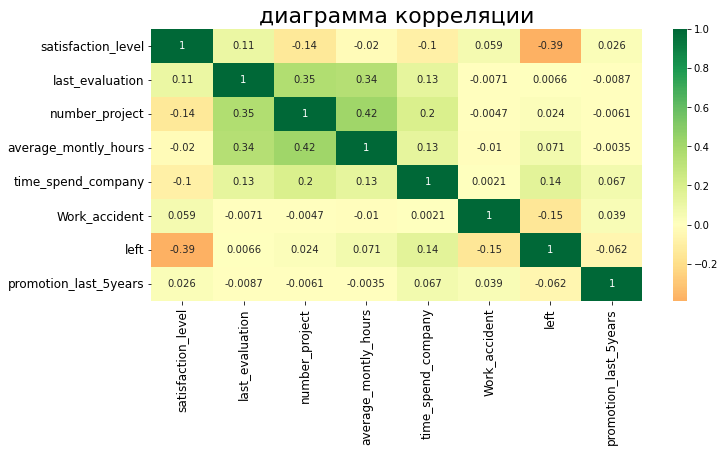

In [9]:
# Построим диаграмма корреляции
#plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('диаграмма корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

verage_montly_hours и number_project две самые скоррелированные переменные
satisfaction_level и left две наименее скоррелированные переменные

In [10]:
# 4. Рассчитайте сколько сотрудников работает в каждом департаменте
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
df.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

5. Показать распределение сотрудников по зарплатам.

<AxesSubplot:ylabel='salary'>

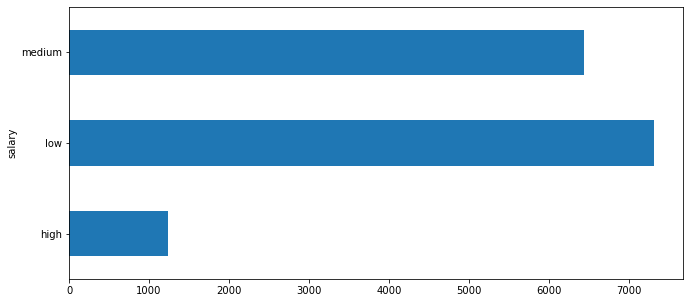

In [12]:
df.groupby('salary')['salary'].count().plot(kind="barh")

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [13]:
df_d = df.groupby([df['department'],df['salary']])[['salary']].count()
df_d

salary
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

<AxesSubplot:ylabel='department,salary'>

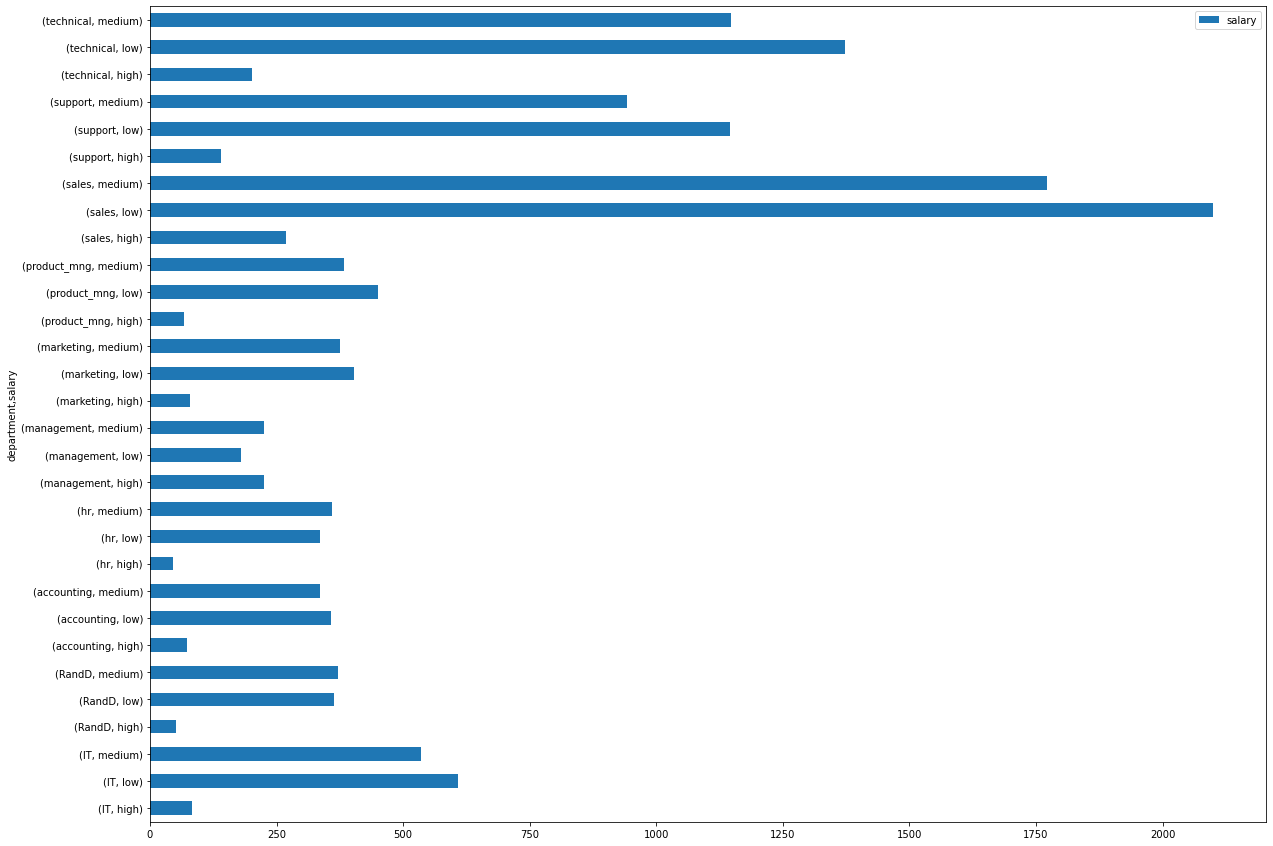

In [14]:
df_d.plot(kind="barh", figsize=(20,15))

Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [15]:
# Тест Стьюдента -  Такой тест показывает, имеют ли две выборки разные средние значения. Здесь нулевая гипотеза заключается в том, что обе группы имеют равные средние.
import scipy.stats as stats
#выбираем часы 
df_high = list(df.loc[df['salary'] == 'high']['average_montly_hours'])
df_low = list(df.loc[df['salary'] == 'low']['average_montly_hours'])

stat, p = stats.ttest_ind(df_high, df_low)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")

#При уровне значимости 0.05 
if p > 0.05:
    print("Не отклоняем нулевую гипотезу, сотрудники с высоким окладом проводят на работе примерно одинаковое время , как и сотрудники с низким окладом")
else:
    print("Отклоняем нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом")


Статистика = -0.729, p = 0.466
Не отклоняем нулевую гипотезу, сотрудники с высоким окладом проводят на работе примерно одинаковое время , как и сотрудники с низким окладом


Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности)
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [16]:
# выбираем уволенных сотрудников
df_left = df[df['left']==1]

In [17]:
len(df_left)

3571

In [18]:
df_left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [19]:
len(df_left[df_left['promotion_last_5years'] == 1])

19

In [20]:
19/len(df_left)

0.005320638476617194

Средняя степень удовлетворенности - 0.440098, Среднее количество проектов - 3.855503, Доля сотрудников с повышением за последние 5 лет -0.005320638476617194 

In [21]:
# выбираем работающих  сотрудников
df_emp = df[df['left']==0]
len(df_emp)

11428

In [22]:
# проверим
11428+3571

14999

In [23]:
df_emp.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [24]:
len(df_emp[df_emp['promotion_last_5years'] == 1])/len(df_emp)

0.026251312565628283

Средняя степень удовлетворенности - 0.666810, Среднее количество проектов - 3.786664, Доля сотрудников с повышением за последние 5 лет -0.026251312565628283 

Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и salary)
Оценить качество модели на тестовой выборки

In [25]:
# убираем department и salary
df_lda = df.drop(['department', 'salary'], axis= 1)

In [26]:
df_lda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 937.6 KB


In [27]:
left = pd.array(df_lda['left'])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_lda[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], left, random_state=42)

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [30]:
lda.predict(X_test)]).T
res_lda

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,1


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7536

In [32]:
y_pred = lda.predict(X_test)

In [51]:
y_test

<PandasArray>
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 ...
 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
Length: 3750, dtype: int64

In [59]:
X_test['time_spend_company'].unique()

array([ 2,  3,  5,  4,  7,  6,  8, 10], dtype=int64)

In [55]:
y_test

<PandasArray>
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 ...
 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
Length: 3750, dtype: int64